<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/UAS/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=828a4869-856d-4e92-8431-65ab140f7739
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:05<00:00, 77.2MB/s]
Target Statistics:
count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: 0, dtype: float64


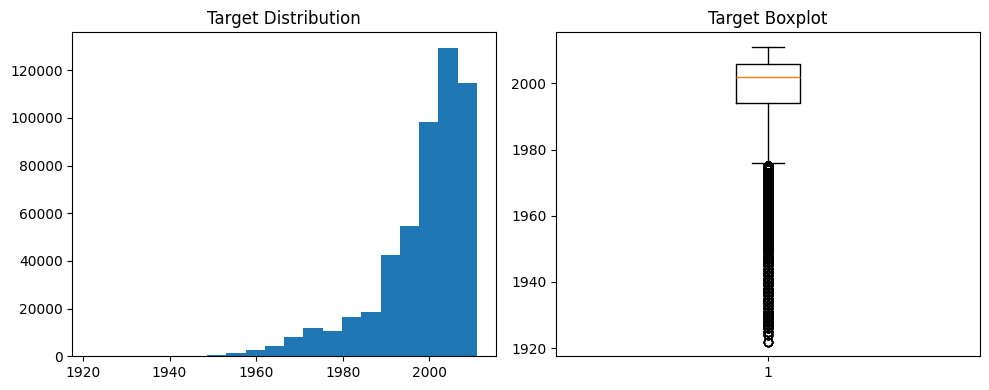

Reduced dimensions: 65 features


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 99.8511 - mae: 7.2755 - val_loss: 92.8862 - val_mae: 6.8841 - learning_rate: 0.0100
Epoch 2/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 95.9642 - mae: 7.1281 - val_loss: 91.5789 - val_mae: 6.9336 - learning_rate: 0.0100
Epoch 3/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 95.1123 - mae: 7.0921 - val_loss: 91.3857 - val_mae: 6.9452 - learning_rate: 0.0100
Epoch 4/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 94.5384 - mae: 7.0654 - val_loss: 90.4106 - val_mae: 6.8360 - learning_rate: 0.0100
Epoch 5/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 93.9321 - mae: 7.0415 - val_loss: 90.7003 - val_mae: 6.8684 - learning_rate: 0.0100
Epoch 6/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 93.7186 - mae: 7.0331 - val_loss: 90.4084 - val_mae: 6.8645 - learning_rate: 0.0100
Epoch 7/500
20614/20614 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 93.4658 - mae: 7.0201 - val_loss: 

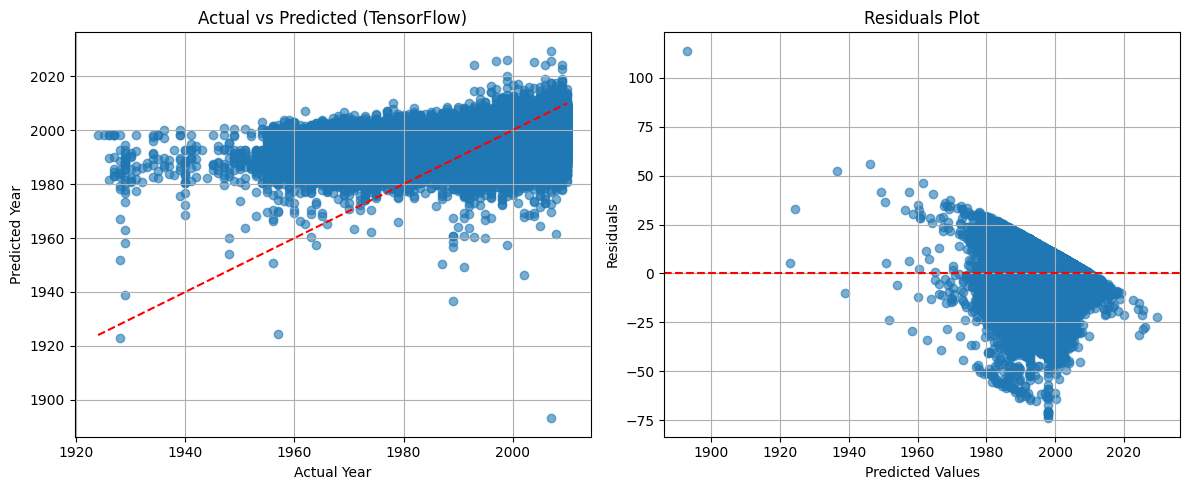


TensorFlow Error Analysis:
        Actual    Predicted  Absolute Error
175691    2007  1893.108765      113.891235
198837    1924  1998.067017       74.067017
140101    1925  1998.067017       73.067017
175742    1926  1998.067017       72.067017
175701    1926  1998.067017       72.067017
175693    1927  1998.067017       71.067017
175736    1927  1998.067017       71.067017
41462     1927  1998.067017       71.067017
135604    1928  1998.067017       70.067017
63233     1931  1998.067017       67.067017

Evaluating Optimized PyTorch Model...


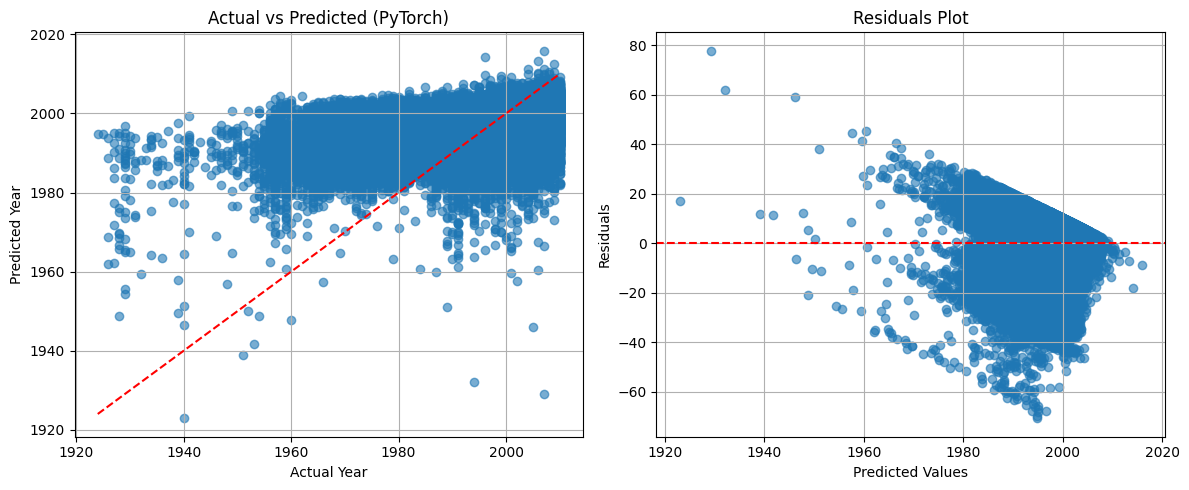


PyTorch Error Analysis:
        Actual    Predicted  Absolute Error
175691    2007  1929.163574       77.836426
198837    1924  1994.841797       70.841797
140101    1925  1994.795410       69.795410
436717    1927  1995.107422       68.107422
192569    1926  1993.822754       67.822754
344495    1929  1996.710571       67.710571
179491    1928  1995.072876       67.072876
135604    1928  1994.417603       66.417603
66734     1929  1995.047974       66.047974
175736    1927  1992.603027       65.603027

Final Model Comparison:
        Model        MSE      RMSE        R²
0  TensorFlow  89.650658  9.468403  0.246728
1     PyTorch  86.636963  9.307898  0.272050

Saved Optimized PyTorch Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Muat dataset
!gdown 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
df = pd.read_csv('RegresiUTSTelkom.csv', header=None)

# Pisahkan fitur dan target
target_col = 0
X = df.drop(columns=target_col)
y = df[target_col]

# 1.1. Analisis target
print("Target Statistics:")
print(y.describe())
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=20)
plt.title('Target Distribution')
plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.title('Target Boxplot')
plt.tight_layout()
plt.show()

# 1.2. Transformasi target
y_transformed = y - 2000  # Normalisasi tahun

# 1.3. Preprocessing fitur
scaler = RobustScaler()  # Lebih robust terhadap outlier
X_scaled = scaler.fit_transform(X)

# 1.4. Reduksi dimensi PCA
pca = PCA(n_components=0.95)  # Pertahankan 95% varians
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced dimensions: {X_pca.shape[1]} features")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_transformed, test_size=0.2, random_state=42
)

def build_optimized_tf_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.2),  # Mengurangi dropout
        Dense(16, activation='relu'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.01)  # LR lebih tinggi
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

class OptimizedPyTorchModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),  # Mengurangi dropout
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.layers(x)

# TensorFlow Model
tf_model = build_optimized_tf_model(X_train.shape[1])
tf_callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=10)
]

tf_history = tf_model.fit(
    X_train, y_train,
    epochs=500,  # Epoch lebih banyak
    batch_size=16,  # Batch lebih kecil
    validation_split=0.2,
    callbacks=tf_callbacks,
    verbose=1
)

# PyTorch Model
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

torch_model = OptimizedPyTorchModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(torch_model.parameters(), lr=0.01, weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2, patience=10)

# Training loop
train_losses = []
val_losses = []
best_loss = float('inf')
patience = 20
counter = 0

for epoch in range(500):
    # Training
    torch_model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = torch_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss/len(train_loader))

    # Validation
    torch_model.eval()
    with torch.no_grad():
        val_outputs = torch_model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
        torch.save(torch_model.state_dict(), 'best_model.pt')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# Muat model terbaik
torch_model.load_state_dict(torch.load('best_model.pt'))

def inverse_transform_y(y):
    return y + 2000  # Kembalikan ke tahun asli

def enhanced_evaluate(name, model, X_test, y_test, framework):
    if framework == 'tensorflow':
        y_pred = model.predict(X_test).flatten()
    else:
        model.eval()
        with torch.no_grad():
            y_pred = model(torch.FloatTensor(X_test)).numpy().flatten()

    # Transformasi balik
    y_test_orig = inverse_transform_y(y_test)
    y_pred_orig = inverse_transform_y(y_pred)

    # Metrik
    mse = mean_squared_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_orig, y_pred_orig)

    # Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test_orig, y_pred_orig, alpha=0.6)
    plt.plot([min(y_test_orig), max(y_test_orig)],
             [min(y_test_orig), max(y_test_orig)], 'r--')
    plt.title(f'Actual vs Predicted ({name})')
    plt.xlabel('Actual Year')
    plt.ylabel('Predicted Year')
    plt.grid(True)

    # Residual plot
    residuals = y_test_orig - y_pred_orig
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_orig, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{name}_enhanced_evaluation.png')
    plt.show()

    # Error analysis
    error_analysis = pd.DataFrame({
        'Actual': y_test_orig,
        'Predicted': y_pred_orig,
        'Absolute Error': np.abs(y_test_orig - y_pred_orig)
    })

    print(f"\n{name} Error Analysis:")
    print(error_analysis.sort_values('Absolute Error', ascending=False).head(10))

    return {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Evaluasi
print("\nEvaluating Optimized TensorFlow Model...")
tf_metrics = enhanced_evaluate("TensorFlow", tf_model, X_test, y_test, 'tensorflow')

print("\nEvaluating Optimized PyTorch Model...")
torch_metrics = enhanced_evaluate("PyTorch", torch_model, X_test, y_test, 'pytorch')

# Perbandingan final
metrics_df = pd.DataFrame({
    'Model': ['TensorFlow', 'PyTorch'],
    'MSE': [tf_metrics['MSE'], torch_metrics['MSE']],
    'RMSE': [tf_metrics['RMSE'], torch_metrics['RMSE']],
    'R²': [tf_metrics['R2'], torch_metrics['R2']]
})

print("\nFinal Model Comparison:")
print(metrics_df)

# Simpan model terbaik
if torch_metrics['R2'] > tf_metrics['R2']:
    torch.save(torch_model.state_dict(), 'optimized_model.pth')
    print("\nSaved Optimized PyTorch Model")
else:
    tf_model.save('optimized_tf_model.h5')
    print("\nSaved Optimized TensorFlow Model")

Analisis dan Kesimpulan
Berdasarkan hasil perbandingan di atas, kita dapat melakukan analisis sebagai berikut:

1. MSE dan RMSE: Model PyTorch menunjukkan nilai MSE (86.64) dan RMSE (9.31) yang lebih rendah dibandingkan dengan model TensorFlow (MSE 89.65 dan RMSE 9.47). Ini mengindikasikan bahwa secara rata-rata, kesalahan prediksi yang dihasilkan oleh model PyTorch lebih kecil daripada model TensorFlow.



 2.  $R^2$ (R-Squared): Model PyTorch juga memiliki nilai $R^2$ yang lebih tinggi (0.272) dibandingkan dengan TensorFlow (0.247). Artinya, model PyTorch mampu menjelaskan sekitar 27.2% variabilitas data, sedangkan model TensorFlow hanya sekitar 24.7%. Meskipun kedua nilai ini mungkin masih tergolong rendah (tergantung pada kompleksitas masalah), model PyTorch tetap menunjukkan kecocokan yang lebih baik terhadap data.

Model Terbaik

Dengan mempertimbangkan ketiga metrik evaluasi, dapat disimpulkan bahwa model PyTorch adalah model terbaik untuk kasus ini. Model PyTorch secara konsisten mengungguli model TensorFlow di semua metrik yang digunakan: memiliki tingkat kesalahan (MSE & RMSE) yang lebih rendah dan kemampuan yang lebih baik untuk menjelaskan data ($R^2$).